# Machine Learning Capstone Project
## By Cyril Michino Chege | 3117300 | [Github](https://github.com/cyrilmichino)
### Bocconi University, Bachelor of Economics and Computer Science (BEMACS)
This is the Machine Learning Capstone Project for BEMACS Program at Bocconi University. The project involves creation of a Classifier with a core focus on Logistic Regression and the Linear Support Vector Machine classification algorithms. [Read more about the project details here](/mldata_0013117300.description.txt)

In [1]:
#Data Analysis and Visualisation Libraries
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action="once")
%matplotlib inline

In [2]:
#Data Preparation, Machine Learning and Model Evaluation Libraries

## Data Description

In [2]:
#Import and visualise data columns
data = pd.read_csv("mldata_0013117300.csv", index_col=0)
data.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,-0.175191,0.299030,-0.768587,-5.384094,1.379607,6.886095,-2.223513,2.469312,2.115212,...,0.600137,3.442208,-0.187299,4.658696,0.800293,3.542705,-1.799686,1.905721,4.658696,-0.722506
1,0,1.051032,0.445523,0.289817,-2.734519,0.083652,2.993606,1.000140,-0.754929,-1.549806,...,1.311651,-1.519870,1.219607,-2.688456,0.975750,2.872060,-1.535260,0.064677,-2.688456,0.184203
2,1,2.803331,-1.521435,-0.100668,1.326577,0.273422,1.984409,1.320005,-0.869559,0.383327,...,0.136577,-0.358939,2.457758,0.697211,-0.622162,3.679804,-1.809725,0.156737,0.697211,-1.897684
3,2,2.689503,-4.120008,-0.766513,-3.445241,0.771095,-0.628063,1.798364,2.100721,-0.749829,...,1.620021,1.461153,-3.721542,-4.701268,0.550195,-1.385252,-2.801007,-1.000042,-4.701268,-1.171352
4,0,-2.330357,2.846977,-1.240633,0.494695,0.204640,4.405562,-2.095133,-2.798952,-0.894024,...,0.030749,1.522194,0.379030,-0.763488,-0.133195,-0.755366,0.977210,2.800476,-0.763488,0.462964


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 31 columns):
label         1300 non-null int64
feature_1     1300 non-null float64
feature_2     1300 non-null float64
feature_3     1300 non-null float64
feature_4     1300 non-null float64
feature_5     1300 non-null float64
feature_6     1300 non-null float64
feature_7     1300 non-null float64
feature_8     1300 non-null float64
feature_9     1300 non-null float64
feature_10    1300 non-null float64
feature_11    1300 non-null float64
feature_12    1300 non-null float64
feature_13    1300 non-null float64
feature_14    1300 non-null float64
feature_15    1300 non-null float64
feature_16    1300 non-null float64
feature_17    1300 non-null float64
feature_18    1300 non-null float64
feature_19    1300 non-null float64
feature_20    1300 non-null float64
feature_21    1300 non-null float64
feature_22    1300 non-null float64
feature_23    1300 non-null float64
feature_24    1300 non-null flo

In [4]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.004615,0.538441,0.564395,0.111548,0.562520,0.118493,0.011493,0.685878,-0.665518,0.102386,...,0.099308,-0.053699,0.278267,0.610309,0.100524,-0.168736,0.230796,-0.084270,0.610309,0.137664
std,0.816484,2.730933,2.581858,1.024461,2.841056,1.006478,2.691406,2.518733,2.550913,0.982101,...,0.988319,2.805581,2.680886,2.567479,1.039176,2.909776,2.601933,2.785952,2.567479,1.001677
min,0.000000,-8.805293,-7.058771,-2.981594,-9.791274,-3.127923,-8.706809,-7.070077,-9.049962,-2.911090,...,-2.875839,-10.390801,-8.155762,-9.411871,-3.090801,-12.026419,-7.851654,-9.155803,-9.411871,-3.446479
25%,0.000000,-1.295377,-1.295175,-0.569006,-1.318707,-0.553303,-1.872059,-0.948267,-2.411363,-0.588623,...,-0.553294,-1.767644,-1.515978,-1.027513,-0.606794,-2.094732,-1.459985,-2.002902,-1.027513,-0.525204
50%,1.000000,0.492913,0.598401,0.116058,0.618974,0.108436,0.131648,0.682126,-0.705892,0.131977,...,0.071335,-0.031281,0.297612,0.631999,0.125241,-0.255620,0.240823,-0.025659,0.631999,0.132356
75%,2.000000,2.318563,2.319545,0.795945,2.515789,0.791900,2.003032,2.314486,1.018762,0.773806,...,0.743727,1.692704,2.141628,2.322417,0.795169,1.710145,2.029344,1.811207,2.322417,0.782378
max,2.000000,9.892331,9.027414,3.482049,10.659040,3.686682,8.958129,8.821828,8.944690,3.217624,...,3.312112,10.386582,8.623338,10.160013,3.694073,8.508229,9.562033,10.102895,10.160013,3.200063


In [6]:
print(data.dtypes)

label           int64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21    float64
feature_22    float64
feature_23    float64
feature_24    float64
feature_25    float64
feature_26    float64
feature_27    float64
feature_28    float64
feature_29    float64
feature_30    float64
dtype: object


### Insights from Data Description:
1. No missing values
2. All features are continuous variables
3. Label is a discrete variable (classification problem)

## Data Visualisation

KeyError: "['Classification Data'] not in index"

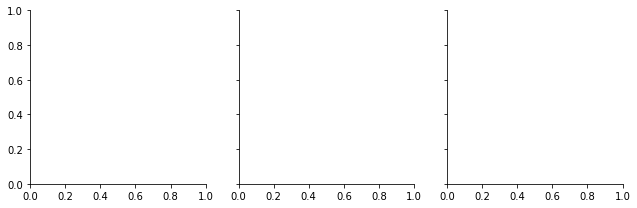

In [14]:
plot = sns.FacetGrid(data, col="label")
plot.map(sns.scatterplot, 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', "Classification Data")